# 페이지 구성

[네이버 파이낸스](http://finance.naver.com)에서 005930(삼성전자) 종목의 재무제표 정보 페이지의 구성을 단계별로 살펴보자. (이 구성은 크롬 혹은 파이어폭스의 개발자 도구로 살펴볼 수 있다) 


## 1) 종목정보
아래 링크에서 종목정보를 볼 수 있다.
* http://finance.naver.com/item/coinfo.nhn?code=005930
* 페이지 아래 부분 "Financial Summary" 영역에 재무제표가 있는데 iframe으로 구성되어 있다.

## 2) Financial Summary 영역
iframe 의 src 링크는 아래와 같이 구성되어 있다.
* http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=005930&target=finsum_more
* 실제 내용은 JavaScript가 HTML 문서를 가져와 붙이도록 되어 있다

## 3) 재무제표
JavaScript가 요청하는 URL은 아래와 같다.
* http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=005930&fin_typ=0&freq_typ=Y


http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=005930&fin_typ=0&freq_typ=Y

<img src="http://i.imgur.com/eDBaYUR.png" >

네이버 파이낸스에서 재무제표 데이터를 크롤링 하기 위해 알아야 할 정보는 아래 URL이 전부다.

http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=105560&fin_typ=0&freq_typ=Y

URL을 구성하는 파라미터의 의미는 다음과 같다.

인자 | 의미 | 값
-- | -- | --
cmp_cd |  종목코드 | 005930 (종목코드)
fin_typ | 재무제표 타입 | 0: 주재무제표, 1: GAAP개별, 2: GAAP연결, 3: IFRS별도, 4:IFRS연결
freq_typ | 기간 | Y:년, Q:분기

# pandas.read_html 활용한 크롤링

pandas.read_html(url)은 HTML 페이지에 포함된 TABLE들을 DataFrame 의 리스트로 반환한다. 우리가 사용하는 재무제표 URL 페이지는 1개의 TABLE만을 가지고 있기 때문에 첫번째 [0] 요소가 바로 재무제표 정보를 담은 DataFrame이 된다.

pd.set_option('display.float_format', '{:,.1f}'.format) 

DataFrame 을 화면에 표시할 때 보기 좋도록 하기 위한 것이다. 천 단위에 ',' 표시와 소수점 이하 1자리를 표시하도록 했다. 쓰지 않더라고 아무런 지장은 없다.

In [1]:
import pandas as pd

url_tmpl = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=%s&fin_typ=%s&freq_typ=%s'
url = url_tmpl % ('005930', '4', 'Y') # 삼성전자, 4(IFRS 연결), Y:년 단위

dfs = pd.read_html(url)
df = dfs[0]
df = df.set_index('주요재무정보')
df.head()
df.head(10) # 10개 항목만 표시(실제 32개 항목)

,연간,2012/12 (IFRS연결),2013/12 (IFRS연결),2014/12 (IFRS연결),2015/12 (IFRS연결),2016/12 (IFRS연결),2017/12(E) (IFRS연결),2018/12(E) (IFRS연결),2019/12(E) (IFRS연결)
주요재무정보,,,,,,,,,
매출액,2011036.0,2286927.0,2062060.0,2006535.0,2018667.0,2320654.0,2483433.0,2577665.0,NaN
영업이익,290493.0,367850.0,250251.0,264134.0,292407.0,501299.0,539778.0,548374.0,NaN
세전계속사업이익,299150.0,383643.0,278750.0,259610.0,307137.0,510689.0,552528.0,566121.0,NaN
당기순이익,238453.0,304748.0,233944.0,190601.0,227261.0,381450.0,411558.0,421406.0,NaN
당기순이익(지배),231854.0,298212.0,230825.0,186946.0,224157.0,375134.0,404875.0,414737.0,NaN
당기순이익(비지배),6599.0,6535.0,3119.0,3655.0,3104.0,NaN,NaN,NaN,NaN
자산총계,1810716.0,2140750.0,2304230.0,2421795.0,2621743.0,2949891.0,3302415.0,3662644.0,NaN
부채총계,595914.0,640590.0,623348.0,631197.0,692113.0,742994.0,765753.0,786194.0,NaN
자본총계,1214802.0,1500160.0,1680882.0,1790598.0,1929630.0,2206897.0,2536662.0,2876451.0,NaN


단, 5줄의 코드로 삼성전자 재무제표를 크롤링 했다! (의외로 이렇게 크롤링 할 수 있는 정보들이 꽤 많다)

# 문제점과 해결방안
표시된 DataFrame을 자세히 살펴보면 아래와 같은 문제점들이 있다. (대부분 네이버 파이낸스 페이지의 HTML TABLE 표현의 문제다)

### 문제점
1. '연간'이른 컬럼명이 추가되었고, 컬럼 이름이 한 컬럼씩 오른쪽으로 밀렸다. 
2. 마지막 컬럼의 값이 NaN 값 (컬럼 이름이 밀려서 발생)
3. 날짜에 "(IFRS연결)"와 같이 불필요한 문자열 포함하고 있다.
4. 시계열 데이터로 처리하려면, '주요재무정보'가 컬럼이 되고 날짜가 행(row)가 되는 것이 편리하다.

### 각 문제에 대한 해결방안
1. 컬럼명 '연간' 삭제
2. 컬럼 문자열에서 날짜(년, 월)만 추출 (정규식 사용)
3. 마지막 컬럼 삭제
4. 컬럼과 로우를 전환 (df.T) 한다 (transpose 우리말로 전치행렬 이라고 한다)

# 1. 컬럼명 '연간' 삭제

In [2]:
# 리스트로 전환
cols = list(df.columns)
cols

['연간',
 '\n\t\t\t\t\t\t\t\t\t2012/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2013/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2014/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2015/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2016/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2017/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2018/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2019/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t']

In [3]:
cols.remove('연간')
cols

['\n\t\t\t\t\t\t\t\t\t2012/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2013/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2014/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2015/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2016/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2017/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2018/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2019/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t']

# 2. 컬럼 문자열에서 날짜(년, 월) 추출

컬럼은 날짜 데이터이다. 그러나 불필요한 문자('\n', '\t', '(IFRS연결)' 등)이 포함되어 있다. 추후 Datetime으로 활용하기 위해 날짜에 해당하는 문자열만 추출해 보자.

```
'\n\t\t\t\t\t\t\t\t\t2011/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t' 
```


위 문자열에서 '2011/12' 문자열만 추출하기 위해 아래와 같은 코드를 사용할 수 도 있겠지만,

```python
    date_str = r['date'].replace('\t', '').replace('\n', '')
    date_str = date_str.replace('(E)', '')
    date_str = date_str.replace('/', '-')
    date_str = date_str.replace(')', '')
```

정규식(regular expression)을 사용하는 것이 훨씬 깔끔하고 적응력이 좋아진다. 
날짜 추출에 필요한 정규식을 만들어 보자.

In [4]:
import re
from datetime import datetime

s =  '\n\t\t\t\t\t\t\t\t\t2011/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t'

date_str = ''
r = re.search("\d{4}/\d{2}", s)
if r:
    date_str = r.group()

date_str

'2011/12'

날짜를 추출하는 내용을 함수로 만들어 컬럼 이름에 적용한다.

In [5]:
import re
from datetime import datetime

def get_date_str(s):
    date_str = ''
    r = re.search("\d{4}/\d{2}", s)
    if r:
        date_str = r.group()
        date_str = date_str.replace('/', '-')

    return date_str

이 함수를 사용하여 아래와 같이 모든 컬럼에서 날짜에 해당하는 문자열을 추출할 수 있다.

In [6]:
cols = [get_date_str(x) for x in cols]
cols

['2012-12',
 '2013-12',
 '2014-12',
 '2015-12',
 '2016-12',
 '2017-12',
 '2018-12',
 '2019-12']

# 3. 마지막 컬럼 제외

In [7]:
df = df.ix[:, :-1]
df.head()

,연간,2012/12 (IFRS연결),2013/12 (IFRS연결),2014/12 (IFRS연결),2015/12 (IFRS연결),2016/12 (IFRS연결),2017/12(E) (IFRS연결),2018/12(E) (IFRS연결)
주요재무정보,,,,,,,,
매출액,2011036.0,2286927.0,2062060.0,2006535.0,2018667.0,2205512.0,2330379.0,2360945.0
영업이익,290493.0,367850.0,250251.0,264134.0,292407.0,411300.0,437803.0,479730.0
세전계속사업이익,299150.0,383643.0,278750.0,259610.0,307137.0,424113.0,452598.0,NaN
당기순이익,238453.0,304748.0,233944.0,190601.0,227261.0,314572.0,335585.0,373760.0
당기순이익(지배),231854.0,298212.0,230825.0,186946.0,224157.0,310125.0,330782.0,NaN


In [8]:
# 컬럼이름 변경

df.columns = cols
df.head()

,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12
주요재무정보,,,,,,,,
매출액,2011036.0,2286927.0,2062060.0,2006535.0,2018667.0,2205512.0,2330379.0,2360945.0
영업이익,290493.0,367850.0,250251.0,264134.0,292407.0,411300.0,437803.0,479730.0
세전계속사업이익,299150.0,383643.0,278750.0,259610.0,307137.0,424113.0,452598.0,NaN
당기순이익,238453.0,304748.0,233944.0,190601.0,227261.0,314572.0,335585.0,373760.0
당기순이익(지배),231854.0,298212.0,230825.0,186946.0,224157.0,310125.0,330782.0,NaN


# 4. 컬럼과 로우 전환
DataFrame.T (transpose, 전치행열)를 사용하면 행, 열이 전환된 DataFrame을 구할 수 있다. 시간을 인덱스로하여 시계열 데이터로 만드는 것이 데이터 분석과 시각화에 유리하다.

In [9]:
dft = df.T

# 첫번째 컬럼 이름을 data로 변경
dft.rename(columns={'주요재무정보':'date'}, inplace=True)

# 인덱스를 날짜형식(datetime)으로 변환
dft.index = pd.to_datetime(dft.index)

# 필요한 컬럼만 출력해 본다
dft[['매출액', '당기순이익', '부채총계', 'PER(배)' , 'PBR(배)', '현금배당수익률']]

주요재무정보,매출액,당기순이익,부채총계,PER(배),PBR(배),현금배당수익률
2012-12-01,2011036.0,238453.0,595914.0,11.17,1.96,0.53
2013-12-01,2286927.0,304748.0,640590.0,7.83,1.43,1.04
2014-12-01,2062060.0,233944.0,623348.0,9.78,1.23,1.51
2015-12-01,2006535.0,190601.0,631197.0,11.47,1.06,1.67
2016-12-01,2018667.0,227261.0,692113.0,13.18,1.35,1.58
2017-12-01,2205512.0,314572.0,690817.0,10.45,1.35,1.58
2018-12-01,2330379.0,335585.0,713188.0,9.79,1.20,1.69
2019-12-01,2360945.0,373760.0,NaN,NaN,NaN,NaN


In [10]:
# 컬럼 확인

dft.columns

Index(['매출액', '영업이익', '세전계속사업이익', '당기순이익', '당기순이익(지배)', '당기순이익(비지배)', '자산총계',
       '부채총계', '자본총계', '자본총계(지배)', '자본총계(비지배)', '자본금', '영업활동현금흐름', '투자활동현금흐름',
       '재무활동현금흐름', 'CAPEX', 'FCF', '이자발생부채', '영업이익률', '순이익률', 'ROE(%)',
       'ROA(%)', '부채비율', '자본유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)',
       '현금DPS(원)', '현금배당수익률', '현금배당성향(%)', '발행주식수(보통주)'],
      dtype='object', name='주요재무정보')

In [11]:
# 인덱스 확인

dft.index

DatetimeIndex(['2012-12-01', '2013-12-01', '2014-12-01', '2015-12-01',
               '2016-12-01', '2017-12-01', '2018-12-01', '2019-12-01'],
              dtype='datetime64[ns]', freq=None)

# 정리: 함수로 만들기

재사용하기 위해 앞선 내용을 정리하여 함수로 만든다.

In [5]:
import re
from datetime import datetime
import pandas as pd
import requests
from bs4 import BeautifulSoup

'''
get_date_str(s) - 문자열 s 에서 "YYYY/MM" 문자열 추출
'''
def get_date_str(s):
    date_str = ''
    r = re.search("\d{4}/\d{2}", s)
    if r:
        date_str = r.group()
        date_str = date_str.replace('/', '-')

    return date_str

'''
* code: 종목코드
* fin_type = '0': 재무제표 종류 (0: 주재무제표, 1: GAAP개별, 2: GAAP연결, 3: IFRS별도, 4:IFRS연결)
* freq_type = 'Y': 기간 (Y:년, Q:분기)
'''
def get_finstate_naver(code, fin_type='0', freq_type='Y'):
    url_tmpl = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?' \
                   'cmp_cd=%s&fin_typ=%s&freq_typ=%s'

    url = url_tmpl % (code, fin_type, freq_type)
    #print(url)

    dfs = pd.read_html(url, encoding="utf-8")
    df = dfs[0]
    if df.ix[0,0].find('해당 데이터가 존재하지 않습니다') >= 0:
        return None

    df.rename(columns={'주요재무정보':'date'}, inplace=True)
    df.set_index('date', inplace=True)

    cols = list(df.columns)
    if '연간' in cols: cols.remove('연간')
    if '분기' in cols: cols.remove('분기')
    cols = [get_date_str(x) for x in cols]
    df = df.ix[:, :-1]
    df.columns = cols
    dft = df.T
    dft.index = pd.to_datetime(dft.index)

    # remove if index is NaT
    dft = dft[pd.notnull(dft.index)]
    return dft

In [39]:
# 삼성전자 (년간, IFRS연결)
df = get_finstate_naver('005930')
df['매출액','영업이익', '당기순이익', '영업활동현금흐름', '순이익률']


KeyError: ('매출액', '영업이익', '당기순이익', '영업활동현금흐름', '순이익률')

# 활용 예

In [42]:
#df = get_finstate_naver('035720') # 셀트리온 068270 
df = get_finstate_naver('035720') # 카카오 035720
#df = get_finstate_naver('035720') # CJ E&M 130960
#df = get_finstate_naver('035720') # 메디톡스 086900

df[['ROE(%)', 'ROA(%)', '부채비율', '자본유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)']]

date,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배)
2012-12-01,15.70,13.09,17.68,7376.32,5656.0,16.11,38158.0,2.39
2013-12-01,17.73,14.81,22.53,728.30,4532.0,18.54,13398.0,6.27
2014-12-01,11.41,10.04,12.37,8411.95,6116.0,20.21,42337.0,2.92
2015-12-01,3.02,2.65,23.32,8407.52,1269.0,91.24,42476.0,2.73
2016-12-01,1.93,1.51,48.10,10068.46,874.0,88.15,50769.0,1.52
2017-12-01,3.85,2.57,47.57,NaN,1985.0,53.15,52459.0,2.01
2018-12-01,4.45,3.02,46.77,NaN,2382.0,44.29,54551.0,1.93
2019-12-01,5.28,3.67,45.43,NaN,2951.0,35.75,57315.0,1.84


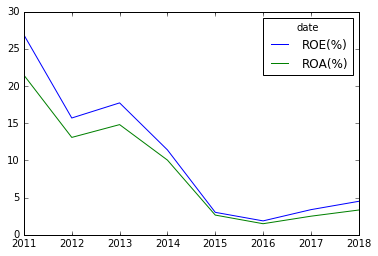

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

df[['ROE(%)', 'ROA(%)']].plot()

# csv로 저장
DataFrmae (재무제표 데이터)를 .csv로 저장하고자 한다면,

In [16]:
df.to_csv('035720.csv')

In [17]:
# 확인
! head 035720.csv

,매출액,영업이익,세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2011-12-01,4213.0,1168.0,1274.0,1080.0,1085.0,-5.0,5587.0,1025.0,4562.0,4565.0,-3.0,68.0,1118.0,-1140.0,-140.0,428.0,690.0,6.0,27.71,25.63,26.86,21.45,22.46,6533.61,8079.0,14.85,34031.0,3.53,1607.0,1.34,19.9,13454569.0
2012-12-01,4534.0,1018.0,1009.0,766.0,763.0,4.0,6119.0,919.0,5199.0,5153.0,46.0,68.0,1233.0,-513.0,-322.0,368.0,865.0,1.0,22.44,16.9,15.7,13.09,17.68,7376.32,5656.0,16.11,38158.0,2.39,1110.0,1.22,19.65,13504829.0
2013-12-01,2108.0,659.0,604.0,614.0,614.0,0.0,2172.0,399.0,1773.0,1773.0,0.0,210.0,705.0,-583.0,12.0,133.0,572.0,,31.24,29.13,17.73,14.81,22.53,728.3,4532.0,18.54,13398.0,6.27,1133.0,1.35,24.41,13560229.0
2014-12-01,4989.0,1764.0,1688.0,1498.0,1501.0,-3.0,27680.0,3048.0,24632.0,24546.0,86.0,291.0,2203.0,1726.0,354.0,128.0,2075.0,3.0,35.

# 요약

* 파이썬 데이터 크롤링, requests를 주로 사용하지만 TABLE에 pandas.read_html()를 사용하여 간결하게 처리할 수 있다.
* 정규식을 사용하여 문자열을 추출하는 것이 유연성과 적응성이 뛰어나다. (replace 같은 문자열 처리함수를 사용하는 것 보다.
* pandas.DataFrame의 컬럼, 인덱스 조작을 통해 DataFrame을 적절하게 가공할 수 있다.
* DataFrame으로 만들어지면 파일(csv, excel, RDB)등으로 변환하기 좋고, 시각화 하기도 용이하다.

#### 2017 https://facebook.com/financedata